## Definição do sinal a ser utilizado

Text(0, 0.5, 'signal(x)')

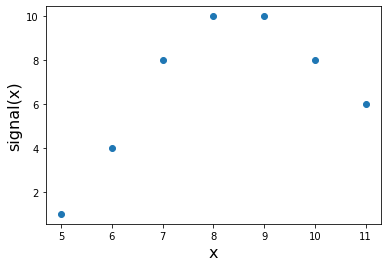

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(5, 12)
signal = [1, 4, 8, 10, 10, 8, 6]
plt.plot(x, signal, 'o')
plt.xlabel('x', size=16)
plt.ylabel('signal(x)', size=16)

# 1. Interpolação do sinal com o dobro da taxa de amostragem

Temos os valores do sinal respectivos aos valores de x indo de 0 a 6 em intervalos de 1. Queremos obter um novo sinal superamostrado, definido para os valores de x entre 0 e 6 em intervalos de 0.5. Nesse novo sinal, já conhecemos qual será o valor do sinal em x=0, x=1, x=2, x=3, x=4, x=5 e x=6. O que precisamos descobrir são os valores do sinal em x=0.5, x=1.5, x=2.5, x=3.5, x=4.5 e x=5.5. Para isso podemos utilizar diferentes estratégias de interpolação.

## 1.1 Interpolação de vizinho mais próximo

Nesse caso, supomos que o valor desconhecido em cada ponto x é igual ao valor conhecido mais próximo do ponto x.

Text(0, 0.5, 'signal(x)')

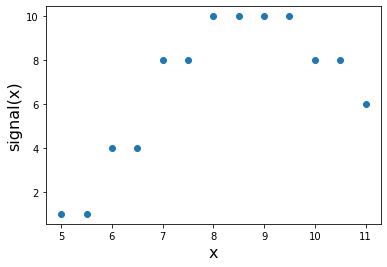

In [2]:
def nearest_neighbor_interp_2x(signal):
    
    signal_interp = np.zeros(2*len(signal)-1)   # -1 é para evitar extrapolação ao invés de interpolação
    for ind in range(len(signal)-1):
        indice_interp = 2*ind
        signal_interp[indice_interp] = signal[ind]
        signal_interp[indice_interp+1] = signal[ind]
    signal_interp[-1] = signal[-1]
    
    return signal_interp

x_interp = np.arange(5, 11.5, 0.5)
signal_interp = nearest_neighbor_interp_2x(signal)

plt.plot(x_interp, signal_interp, 'o')
plt.xlabel('x', size=16)
plt.ylabel('signal(x)', size=16)    

## 1.2 Interpolação linear

Suponha que $x$ é o ponto onde o valor do sinal é desconhecido. A interpolação linear envolve utilizarmos os valores conhecidos do sinal que estão imediatamente antes e depois do ponto $x$. Seja $x_e$ e $x_d$ esses dois pontos, e $y_e$ e $y_d$ o valor do sinal nesses dois pontos. Definimos então uma reta que passa por esses dois pontos utilizando a equação de reta

\begin{equation}
y(x) = y_e + \frac{y_d-y_e}{x_d-x_e}(x-x_e)
\end{equation}

Podemos então calcular o valor de $y(x)$ no ponto $x$ desconhecido.

Text(0, 0.5, 'signal(x)')

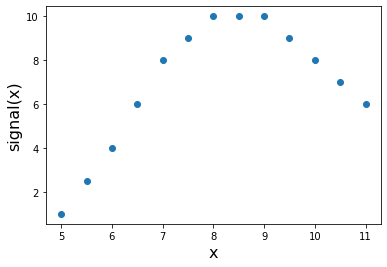

In [3]:
def linear_interpol_2x(signal, x, x_interp):
    
    signal_interp = np.zeros(2*len(signal)-1)
    for ind in range(len(signal)-1):
        ind_interp = 2*ind
        signal_interp[ind_interp] = signal[ind]

        x_e = x[ind]
        x_d = x[ind+1]
        y_e = signal[ind]
        y_d = signal[ind+1]

        y_x = y_e + (x_interp[ind_interp+1]-x_e)*(y_d-y_e)/(x_d-x_e)
        signal_interp[ind_interp+1] = y_x
    signal_interp[-1] = signal[-1]
    
    return signal_interp

x_interp = np.arange(5, 11.5, 0.5)
signal_interp = linear_interpol_2x(signal, x, x_interp)

plt.plot(x_interp, signal_interp, 'o')
plt.xlabel('x', size=16)
plt.ylabel('signal(x)', size=16)  

## 1.3 Interpolação utilizando correlação/convolução

In [4]:
from scipy.signal import correlate

def upsample_2x(signal, filt):
    '''Interpola sinal utilizando o filtro fornecido na variável filtro'''
    
    signal_upsampled = np.zeros(2*len(signal)-1)
    for ind in range(len(signal)-1):
        indice_interp = 2*ind
        signal_upsampled[indice_interp] = signal[ind]
    signal_upsampled[-1] = signal[-1]

    signal_interp = correlate(signal_upsampled, filt, mode='same')
    
    return signal_interp

### Interpolação de vizinho mais próximo

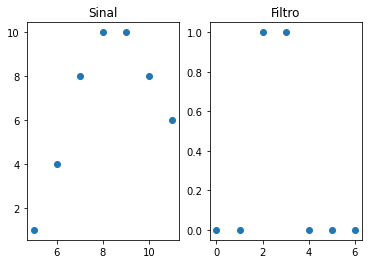

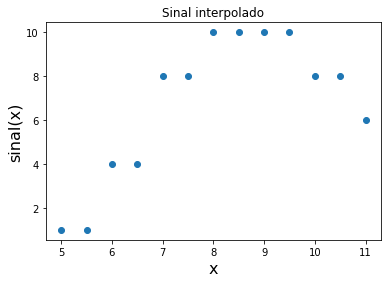

In [5]:
def plot_data(x, signal, x_interp, signal_interp, w):

    plt.subplot(1, 2, 1)
    plt.plot(x, signal, 'o')
    plt.title('Sinal')
    plt.subplot(1, 2, 2)
    plt.plot(w, 'o')
    plt.title('Filtro')

    plt.figure()
    plt.plot(x_interp, signal_interp, 'o')
    plt.xlabel('x', size=16)
    plt.ylabel('sinal(x)', size=16) 
    plt.title('Sinal interpolado')

x_interp = np.arange(5, 11.5, 0.5)
# Cria filtro caixa
w = np.zeros(7)
w[2:4] = 1
signal_interp_0 = upsample_2x(signal, w)
plot_data(x, signal, x_interp, signal_interp_0, w)

### Interpolação linear

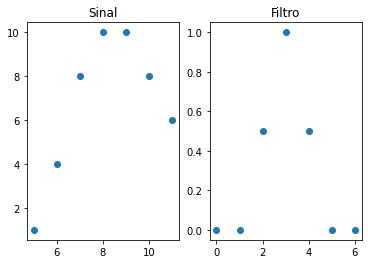

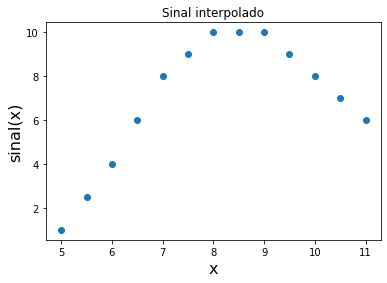

In [6]:
# Cria filtro triângulo, usado para interpolação linear (ordem 1)
# O filtro triângulo é definido pela correlação entre dois filtros caixa
w2 = correlate(w, w, mode='same')
w2 = w2/2
signal_interp_1 = upsample_2x(signal, w2)

plot_data(x, signal, x_interp, signal_interp_1, w2)

### "Interpolação" cúbica (ordem 3)

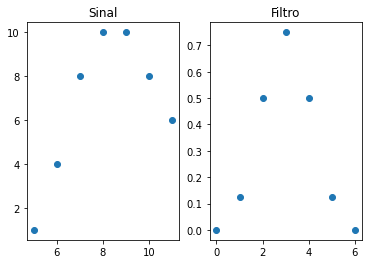

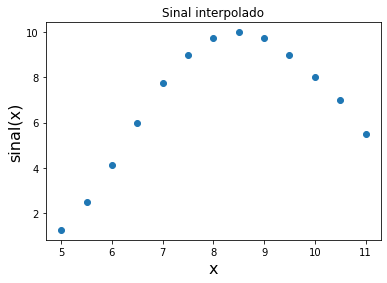

In [7]:
# Cria filtro de "interpolação" de ordem 3, definido pela correlação
# entre dois filtros triângulo. Esse filtro não é realmnete um filtro
# de interpolação, pois os valores do sinal interpolado nas posições
# x=0, x=1, x=2, etc não são os mesmos do sinal original
w3 = correlate(w2, w2, mode='same')
w3 = w3/2
signal_interp_3 = upsample_2x(signal, w3)

plot_data(x, signal, x_interp, signal_interp_3, w3)

Text(0, 0.5, 'sinal(x)')

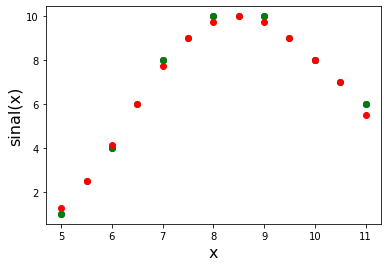

In [8]:
# Comparação entre sinais interpolados
plt.plot(x, signal, 'bo')
plt.plot(x_interp, signal_interp_1, 'go')
plt.plot(x_interp, signal_interp_3, 'ro')
plt.xlabel('x', size=16)
plt.ylabel('sinal(x)', size=16) 

### Interpolação cúbica (ordem 3)

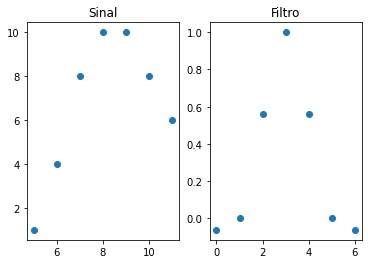

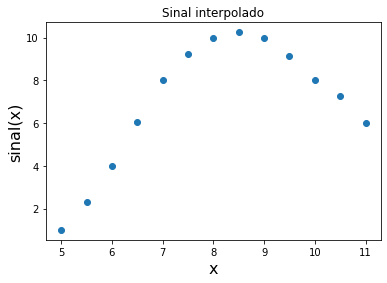

In [9]:
# Filtro de interpolação de ordem 3, conhecido como interpolação cúbica.
w_c = [-0.0625, 0, 0.5625, 1, 0.5625, 0, -0.0625]
signal_interp_c = upsample_2x(signal, w_c)

plot_data(x, signal, x_interp, signal_interp_c, w_c)